In [1]:
from img_doc.data_structures import Document, INT_LABEL
from img_doc.extractors.document_extractors import TsPubLayNetExtractor
from img_doc.extractors.document_extractors.dataset_extractors import dataset2json
from img_doc.extractors.block_extractors import Word2Block2BlockLabelExtractor
from img_doc.extractors.block_extractors.block_label_extractor import MDistMAngBold

2024-02-14 13:17:13.197996: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-14 13:17:13.235469: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-14 13:17:13.235502: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-14 13:17:13.236672: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-14 13:17:13.242572: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-14 13:17:13.242985: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
doc1 = Document()
doc1.set_from_path("pdf/Rosenblatt1958.pdf")

In [2]:
doc2 = Document()
doc2.set_from_path("img/1.jpg")

In [3]:
ts_ext = TsPubLayNetExtractor()

In [6]:
from time import time
a = time()
docs = ts_ext.dataset_extractor("/home/daniil/program/dataset/mini_ts_publaynet")
time()-a

29.507633924484253

In [14]:
fun_doc2vecs = lambda doc: ([0], [0])
dataset2json("rez.json", "/home/daniil/program/dataset/mini_ts_publaynet", ts_ext, fun_doc2vecs)

open dataset: 33 sec.
create dataset: 0 sec.
save json: 0 sec.


In [13]:
x, y = fun_doc2vecs(docs[0])

In [3]:
mdmab = MDistMAngBold({"path_model": "../model_training/models/MDistMAngBold-MP50/", "count_node":50})
w2b2lb_ext = Word2Block2BlockLabelExtractor(blabel_ext=mdmab)

In [4]:
w2b2lb_ext.extract(doc2)

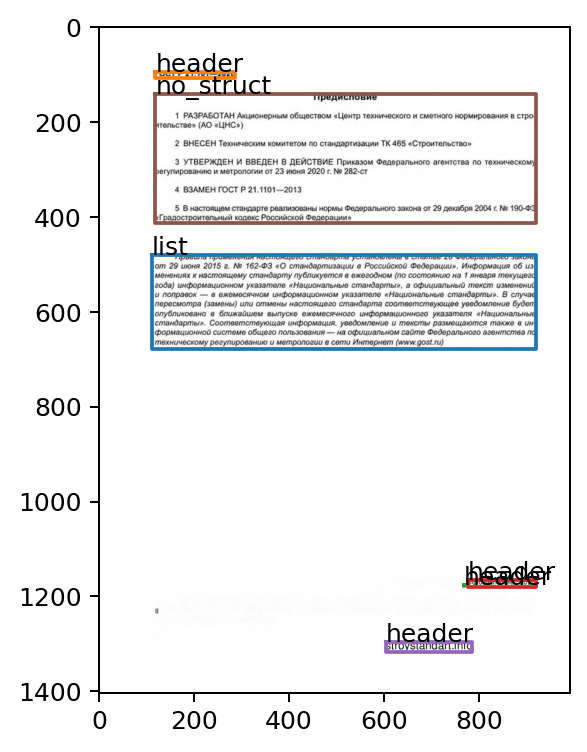

In [7]:
import matplotlib.pyplot as plt
page_i =0

img = doc2.pages[page_i].image.img
blocks = doc2.pages[page_i].blocks

color = ["g", "y", "k", "r"]
plt.figure(dpi=180)
plt.imshow(img)

for block in blocks:
    x0 = block.segment.x_top_left
    y0 = block.segment.y_top_left
    x1 = block.segment.x_bottom_right
    y1 = block.segment.y_bottom_right
    plt.plot([x0, x0, x1, x1, x0], [y0, y1, y1, y0, y0])
    plt.text(x=x0, y=y0, s = INT_LABEL[block.label])